In [31]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import keras
print(tf.version.VERSION)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.3.0


In [ ]:
"""def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files = []
    for filename in os.listdir(SOURCE):
            file = SOURCE + filename
            if os.path.getsize(file) > 0:
                files.append(filename)
            else:
                print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
# YOUR CODE ENDS HERE


COVID_SOURCE_DIR = "D:/project/autocar/Self-driving-car-master/images2/a/"
TRAINING_COVID_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/a/"
TESTING_COVID_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/a/"
NORMAL_SOURCE_DIR ="D:/project/autocar/Self-driving-car-master/images2/d/"
TRAINING_NORMAL_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/d/"
TESTING_NORMAL_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/d/"
PNEUMONIA_SOURCE_DIR ="D:/project/autocar/Self-driving-car-master/images2/w/"
TRAINING_PNEUMONIA_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/w/"
TESTING_PNEUMONIA_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/w/"

split_size = .9
split_data(COVID_SOURCE_DIR, TRAINING_COVID_DIR, TESTING_COVID_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size)
split_data(PNEUMONIA_SOURCE_DIR, TRAINING_PNEUMONIA_DIR, TESTING_PNEUMONIA_DIR, split_size)

"""

In [59]:

TRAINING_DIR ="D:/PROJECTS/Research/Covid19-dataset/train/"
train_datagen = ImageDataGenerator(rescale=1.0/255#,rotation_range=40,
                                ,width_shift_range=0.2,
                                 height_shift_range=0.2,
                                  shear_range=0.2,
                                 zoom_range=0.2,
                                #  horizontal_flip=True,
                                  fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(320, 320))

VALIDATION_DIR = "D:/PROJECTS/Research/Covid19-dataset/test/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              target_size=(320, 320))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [60]:






model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(320, 320, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer=RMSprop(lr=0.0005), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 318, 318, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 159, 159, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 157, 157, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 36, 36, 128)      

In [61]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('val_acc') > 0.95):
                print("\n Reached 95% accuracy so cancelling training!")
                self.model.stop_training=True
callbacks=myCallback()
history = model.fit_generator(train_generator,
                              epochs=200,
                              verbose=2,
                              validation_data=validation_generator,callbacks=[callbacks])

Epoch 1/200
8/8 - 17s - loss: 1.1169 - acc: 0.4024 - val_loss: 1.0102 - val_acc: 0.4848
Epoch 2/200
8/8 - 15s - loss: 1.2787 - acc: 0.5618 - val_loss: 0.8011 - val_acc: 0.7727
Epoch 3/200
8/8 - 16s - loss: 0.7276 - acc: 0.7012 - val_loss: 0.5637 - val_acc: 0.8030
Epoch 4/200
8/8 - 17s - loss: 0.7977 - acc: 0.6494 - val_loss: 0.5321 - val_acc: 0.8485
Epoch 5/200
8/8 - 16s - loss: 0.5640 - acc: 0.7490 - val_loss: 0.5111 - val_acc: 0.8333
Epoch 6/200
8/8 - 16s - loss: 0.7870 - acc: 0.6653 - val_loss: 0.6247 - val_acc: 0.7121
Epoch 7/200
8/8 - 16s - loss: 0.5537 - acc: 0.7809 - val_loss: 2.2765 - val_acc: 0.4848
Epoch 8/200
8/8 - 17s - loss: 0.8526 - acc: 0.7171 - val_loss: 0.5900 - val_acc: 0.6970
Epoch 9/200
8/8 - 19s - loss: 0.5390 - acc: 0.7570 - val_loss: 0.6719 - val_acc: 0.6515
Epoch 10/200
8/8 - 17s - loss: 0.4323 - acc: 0.8406 - val_loss: 0.4044 - val_acc: 0.8788
Epoch 11/200
8/8 - 16s - loss: 0.5588 - acc: 0.7570 - val_loss: 0.4881 - val_acc: 0.8030
Epoch 12/200
8/8 - 17s - loss:

Epoch 94/200
8/8 - 16s - loss: 0.1362 - acc: 0.9562 - val_loss: 0.4305 - val_acc: 0.8333
Epoch 95/200
8/8 - 17s - loss: 0.0475 - acc: 0.9841 - val_loss: 0.5108 - val_acc: 0.8485
Epoch 96/200
8/8 - 17s - loss: 0.1945 - acc: 0.9442 - val_loss: 0.2498 - val_acc: 0.8939
Epoch 97/200
8/8 - 17s - loss: 0.0781 - acc: 0.9681 - val_loss: 0.2701 - val_acc: 0.9242
Epoch 98/200
8/8 - 16s - loss: 0.0432 - acc: 0.9880 - val_loss: 0.4249 - val_acc: 0.8939
Epoch 99/200
8/8 - 17s - loss: 0.0874 - acc: 0.9681 - val_loss: 0.3243 - val_acc: 0.8636
Epoch 100/200
8/8 - 17s - loss: 0.0679 - acc: 0.9801 - val_loss: 0.1706 - val_acc: 0.9091
Epoch 101/200
8/8 - 17s - loss: 0.0649 - acc: 0.9761 - val_loss: 0.3992 - val_acc: 0.8939
Epoch 102/200
8/8 - 17s - loss: 0.1564 - acc: 0.9482 - val_loss: 0.2005 - val_acc: 0.9091
Epoch 103/200
8/8 - 17s - loss: 0.0458 - acc: 0.9841 - val_loss: 1.2035 - val_acc: 0.8182
Epoch 104/200
8/8 - 17s - loss: 0.1119 - acc: 0.9721 - val_loss: 0.5445 - val_acc: 0.8636
Epoch 105/200
8/

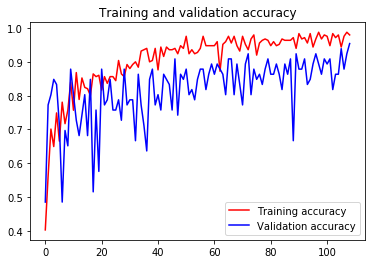

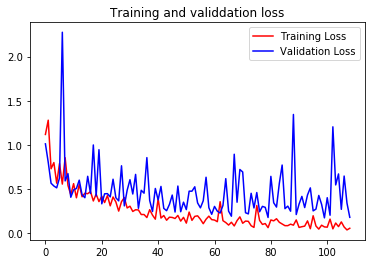

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validdation loss')
plt.legend()

plt.show()

In [69]:
model.save('mymodelcovid.h5',overwrite=True)

In [64]:
import cv2
import numpy as np
from keras.preprocessing import image

In [68]:
#@tf.function
model=tf.keras.models.load_model(r'mymodelcovid.h5')
img = cv2.imread(r"example/3.jpg")    
img = cv2.resize(img,(320,320)) 
x = image.img_to_array(img)
x = np.expand_dims(img, axis=0)

images = np.vstack([x])
classes = model.predict(x, batch_size=4)
classes = np.argmax(classes, axis = 1)
classes = classes[0]
if classes == 1:
    print("normal")
elif classes == 2:
    print("covid positive")
elif classes == 3:
    print("pneumoniatic symptoms")

  # Break the loop


W0906 13:01:35.793656 47200 def_function.py:120] 11 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x0000016BBAD4BC80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


In [ ]:
tf.keras.applications.VGG16(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=(320,320,3),
    pooling=max, classes=3, classifier_activation='softmax'
)